In [1]:
import sys
sys.path.insert(0,'/home/zahradnik/PycharmProjects/master_thesis')

In [2]:
import pandas as pd
import numpy as np
from src.modules import conf, fit, evl, df_columns
import seaborn as sns
import matplotlib.pyplot as plt

/home/zahradnik/PycharmProjects/master_thesis/src/modules/__init__.py
/home/zahradnik/PycharmProjects/master_thesis


In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
%matplotlib inline
sns.set(style='ticks')
plt.rcParams['figure.figsize'] = [24, 8]
plt.rcParams['figure.dpi']

100.0

In [7]:
data = fit.load_pcls(
        conf["Athlete"]["name"],
        conf["Athlete"]["activity_type"],
        conf["Paths"]["pcl"],
    )
len(pd.concat(data))

100%|██████████| 386/386 [00:00<00:00, 926.11it/s] 


922733

In [8]:
train_df = fit.clean_data(pd.concat(data[0:len(data)-1]))
valid_df = fit.clean_data(pd.concat(data[len(data)-1:]))
speed_train = train_df.enhanced_speed
speed_valid = valid_df.enhanced_speed
print(len(train_df),len(valid_df))
print(len(train_df)+len(valid_df))

921332 1401
922733


In [9]:
len(train_df.columns),len(valid_df.columns)

(74, 77)

In [10]:
if len(train_df.columns) > len(valid_df.columns):
    cols = list(valid_df.columns)
else:
    cols = list(train_df.columns)
cols.pop(cols.index('enhanced_speed'))

'enhanced_speed'

In [11]:
df_columns = [x for x in df_columns if x != 'enhanced_speed']

In [12]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# speed_train = train_df.enhanced_speed
# train_df.drop('enhanced_speed',axis=1,inplace=True)
linreg.fit(train_df[cols], speed_train)

LinearRegression()

In [13]:
valid_df.drop('enhanced_speed',axis=1,inplace=True)
y_pred = linreg.predict(valid_df[cols])
y_pred = [x if x > 6 else np.mean(y_pred) for x in y_pred]

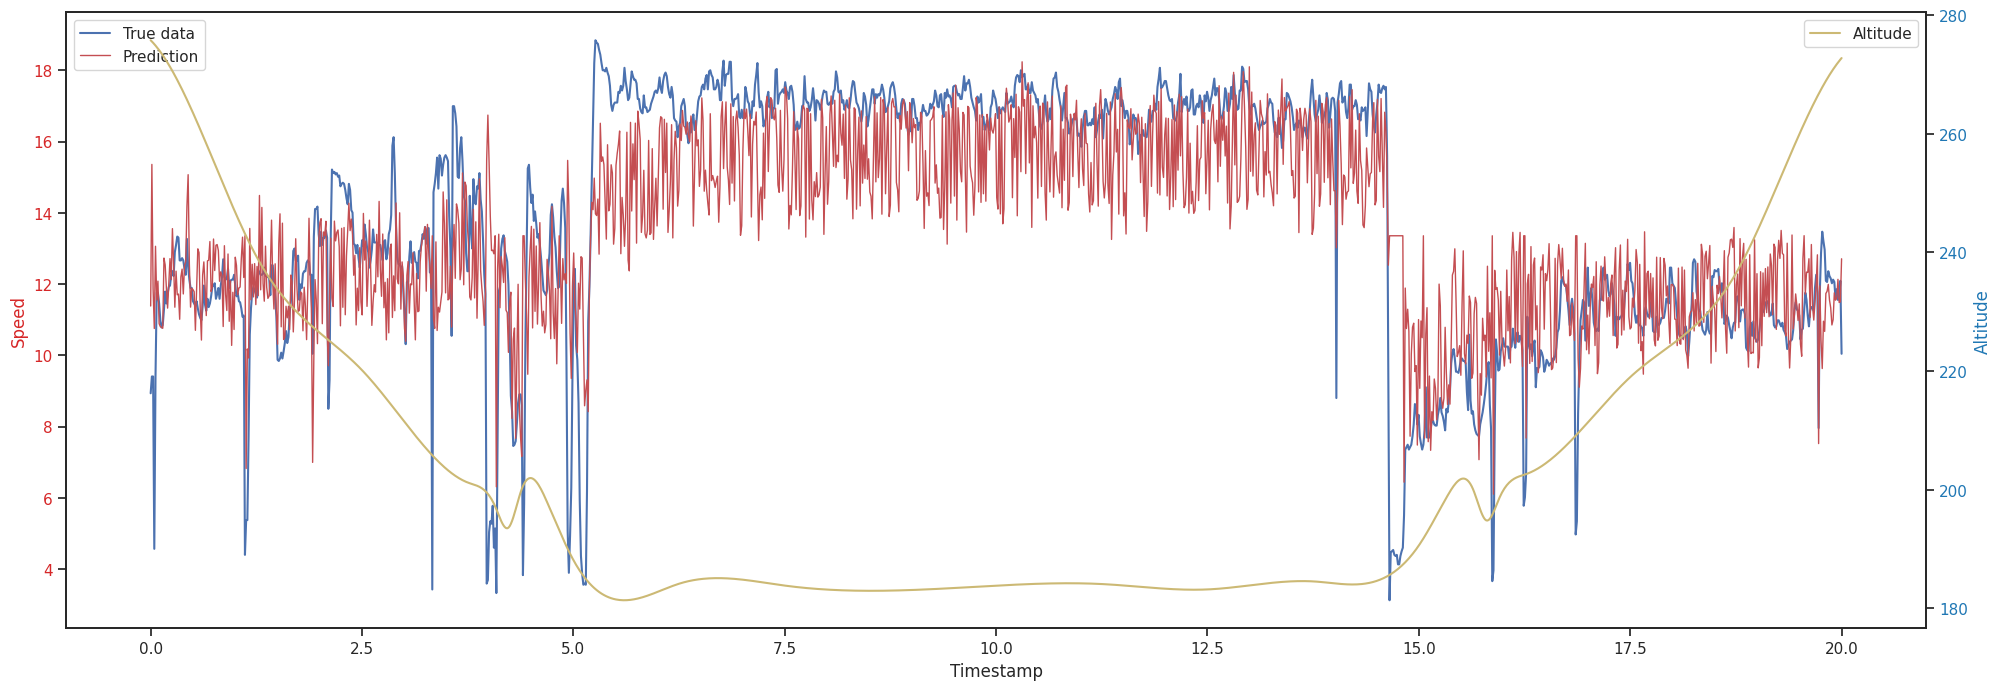

In [14]:
fig = evl.plot(df=valid_df,pred=y_pred,endog='enhanced_speed',true_data=speed_valid)

In [15]:
print(evl.rmse(actual=speed_valid,predicted=y_pred))

2.335646034628211


In [16]:
train_df_ofs = train_df.copy()
valid_df_ofs = valid_df.copy()

In [17]:
drop_columns = [x for x in valid_df.columns if 'heart_rate' in x or 'cadence' in x]

In [18]:
for x in drop_columns:
    if x in train_df_ofs.columns:
        train_df_ofs.pop(x)
    if x in valid_df_ofs.columns:
        valid_df_ofs.pop(x)

In [19]:
cols_ofs = [x for x in cols if 'heart_rate' not in x and 'cadence' not in x]

In [21]:
linreg = LinearRegression()
linreg.fit(train_df_ofs[cols_ofs], speed_train)

LinearRegression()

In [22]:
y_pred_ofs = linreg.predict(valid_df_ofs[cols_ofs])
y_pred_ofs = [x if x > 6 else np.mean(y_pred_ofs) for x in y_pred_ofs]
print(evl.rmse(actual=speed_valid,predicted=y_pred_ofs))

3.614269261878754


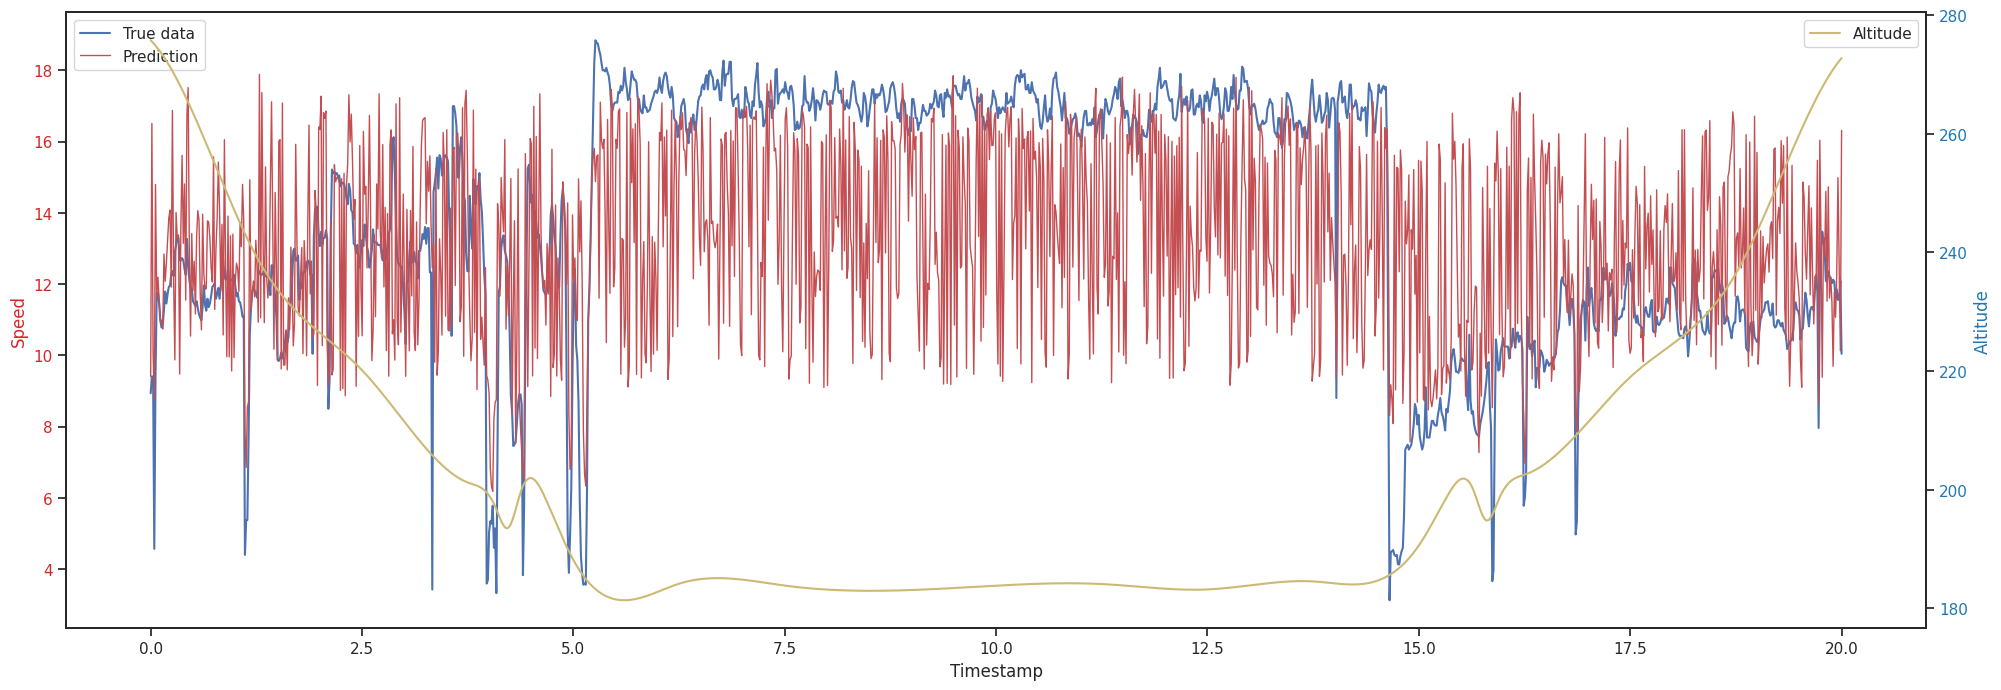

In [23]:
fig = evl.plot(df=valid_df,pred=y_pred_ofs,endog='enhanced_speed',true_data=speed_valid)